# Champagne sales prediction using time series 

In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('Perrin Freres monthly champagne sales millions.csv')

In [37]:
df.dropna(inplace=True)

In [38]:
df

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0
...,...,...
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0


In [135]:
df.tail()

,sales,seasonal_diff,1_shift,forecast
Month,,,,
1972-05-01,4618.0,392.0,170.0,4717.512285
1972-06-01,5312.0,-438.0,-694.0,4906.404762
1972-07-01,4298.0,335.0,1014.0,4685.437775
1972-08-01,1413.0,246.0,2885.0,2232.409169
1972-09-01,5877.0,74.0,-4464.0,NaN


In [39]:
df['Month'] = pd.to_datetime(df['Month'])

In [42]:
df['Month'][0].year

1964

In [43]:
df.set_index('Month',inplace=True)

In [44]:
df

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [45]:
df.rename(columns={'Perrin Freres monthly champagne sales millions ?64-?72':'sales','Month':'date'},inplace=True)

<AxesSubplot:xlabel='Month'>

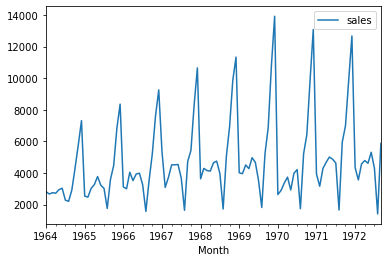

In [46]:
df.plot()

In [23]:
df

,sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


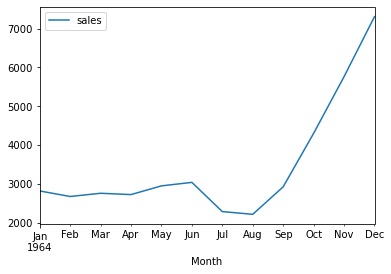

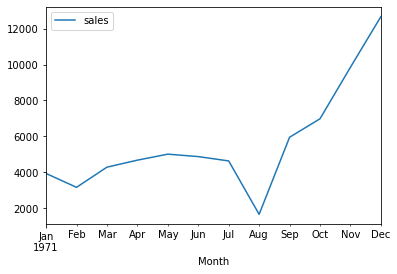

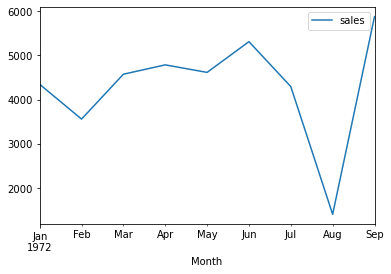

In [55]:
ax=df[df.index.year==1964].plot()
ax=df[df.index.year==1971].plot()
ax=df[df.index.year==1972].plot()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
result = adfuller(df['sales'])

In [19]:
result

(-1.8335930563276188,
 0.363915771660247,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [20]:
# p value is greater than .05

In [62]:
df['1_shift'] = df['sales'].shift(1)-df['sales']

In [60]:
df['seasonal_diff'] = df['sales'].shift(12)-df['sales']

<AxesSubplot:xlabel='Month'>

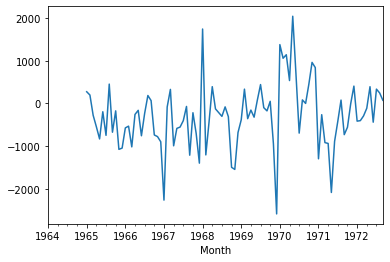

In [61]:
df['seasonal_diff'].plot()

<AxesSubplot:xlabel='Month'>

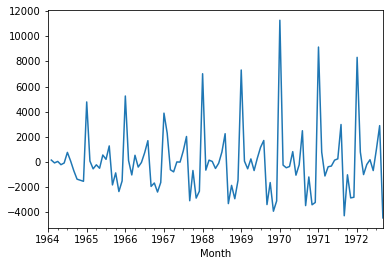

In [64]:
df['1_shift'].plot()#no use

In [80]:
df2 = df.copy()
# df2.dropna(inplace=True)

In [81]:
result = adfuller(df2['seasonal_diff'].dropna())

In [82]:
result

(-7.626619157213166,
 2.0605796968136632e-11,
 0,
 92,
 {'1%': -3.503514579651927,
  '5%': -2.893507960466837,
  '10%': -2.583823615311909},
 1294.7753384560438)

In [83]:
# from pandas.tools.plotting import autocorrelation_plot
# autocorrelation_plot(df2['Sales'])
# plt.show()

In [84]:
df2

,sales,seasonal_diff,1_shift
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,143.0
1964-03-01,2755.0,NaN,-83.0
1964-04-01,2721.0,NaN,34.0
1964-05-01,2946.0,NaN,-225.0
...,...,...,...
1972-05-01,4618.0,392.0,170.0
1972-06-01,5312.0,-438.0,-694.0
1972-07-01,4298.0,335.0,1014.0


In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import statsmodels.graphics.tsa as sm
# import matplotlib.pyplot as plt

/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


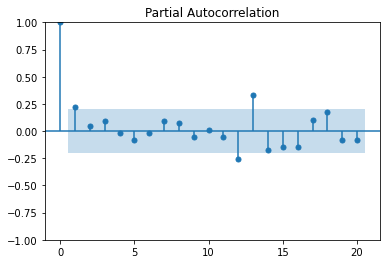

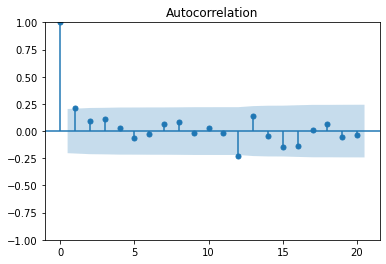

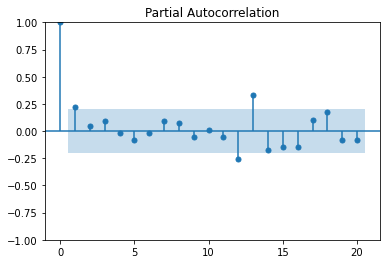

In [96]:

plot_acf(df2['seasonal_diff'].dropna())
plot_pacf(df2['seasonal_diff'].dropna())

In [ ]:
# here we can choose p = 1, q = 1, we have done only one shifting(for seasonality) so we are taking d also as 1

In [107]:
from statsmodels.tsa.arima.model import ARIMA

In [98]:
df2

,sales,seasonal_diff,1_shift
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,143.0
1964-03-01,2755.0,NaN,-83.0
1964-04-01,2721.0,NaN,34.0
1964-05-01,2946.0,NaN,-225.0
...,...,...,...
1972-05-01,4618.0,392.0,170.0
1972-06-01,5312.0,-438.0,-694.0
1972-07-01,4298.0,335.0,1014.0


In [108]:
model=ARIMA(df2['sales'],order=(1,1,1))

/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [113]:
res = model.fit()

In [114]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Fri, 07 Oct 2022   AIC                           1911.627
Time:                        11:44:15   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      3.999      0.000       0.232       0.677
ma.L1         -0.9666      0.056    -17.315      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.473      0.000    4.02e+06    6.43e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
df2

,sales,seasonal_diff,1_shift
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,NaN,143.0
1964-03-01,2755.0,NaN,-83.0
1964-04-01,2721.0,NaN,34.0
1964-05-01,2946.0,NaN,-225.0
...,...,...,...
1972-05-01,4618.0,392.0,170.0
1972-06-01,5312.0,-438.0,-694.0
1972-07-01,4298.0,335.0,1014.0


In [124]:
y=res.predict(start=90,end=103)

In [129]:
df2['forecast'] = y

<AxesSubplot:xlabel='Month'>

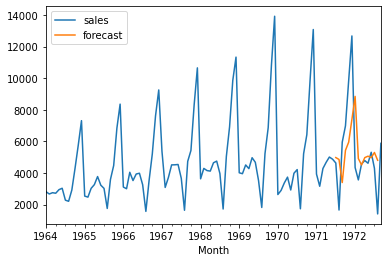

In [131]:
df2[['sales','forecast']].plot()

In [75]:
#since our data is seasonal we can use SARIMAX

In [132]:
import statsmodels.api as sm

In [153]:
df2.loc['1964-01-01':'1971-12-01']['sales']

1964-01-01     2815.0
1964-02-01     2672.0
1964-03-01     2755.0
1964-04-01     2721.0
1964-05-01     2946.0
               ...   
1971-08-01     1659.0
1971-09-01     5951.0
1971-10-01     6981.0
1971-11-01     9851.0
1971-12-01    12670.0
Name: sales, Length: 96, dtype: float64

In [154]:
model=sm.tsa.statespace.SARIMAX(df2.loc['1964-01-01':'1971-12-01']['sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/shaliniantil/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:>

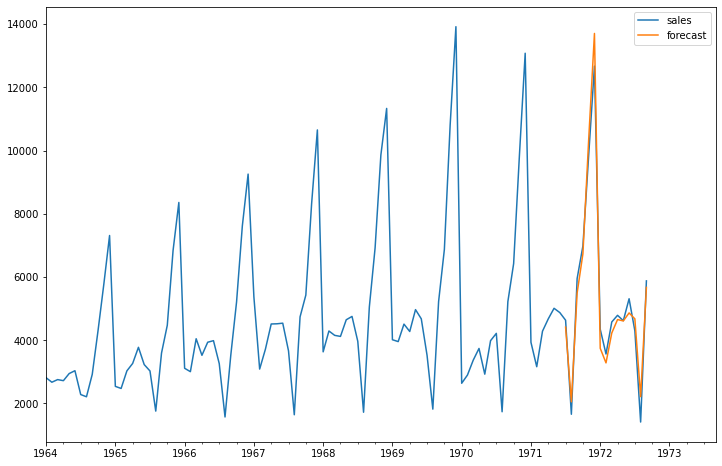

In [156]:
df['forecast']=results.predict(start=90,end=104,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

In [ ]:
#making forecast for future dates

In [140]:
future_dates = pd.date_range('1972-10-01', freq='MS', periods=12)

In [148]:
df = df.append(pd.DataFrame(index=future_dates, columns=df2.columns))

<ipython-input-148-a042e421d8a4>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(index=future_dates, columns=df2.columns))


In [149]:
df

,sales,seasonal_diff,1_shift,forecast
1964-01-01,2815.0,NaN,NaN,NaN
1964-02-01,2672.0,NaN,143.0,NaN
1964-03-01,2755.0,NaN,-83.0,NaN
1964-04-01,2721.0,NaN,34.0,NaN
1964-05-01,2946.0,NaN,-225.0,NaN
...,...,...,...,...
1973-05-01,NaN,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN,NaN
1973-08-01,NaN,NaN,NaN,NaN


<AxesSubplot:>

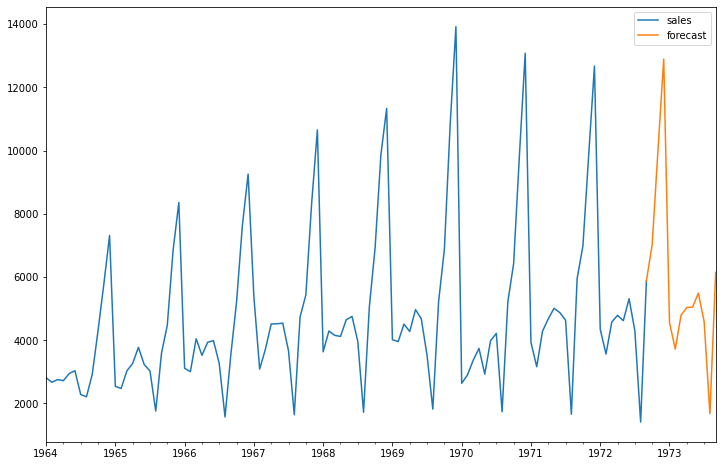

In [150]:
df['forecast']=results.predict(start=104,end=116,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))